## dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

# Importing Boston House dataset

In [2]:
house_price_data = sklearn.datasets.load_boston()
print(house_price_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
#loading data in pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_data.data, columns = house_price_data.feature_names )

In [6]:
#print fisrt 5 rows
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#add target(price) column in dataframe
house_price_dataframe["PRICE"] = house_price_data.target

In [10]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


# Process and Analysis

In [11]:
#no. of rows and column
house_price_dataframe.shape

(506, 15)

In [12]:
#check for missing value
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
PRICE      0
dtype: int64

In [13]:
#statistical measure
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


Understanding correlation

In [15]:
correlation = house_price_dataframe.corr()

<AxesSubplot:>

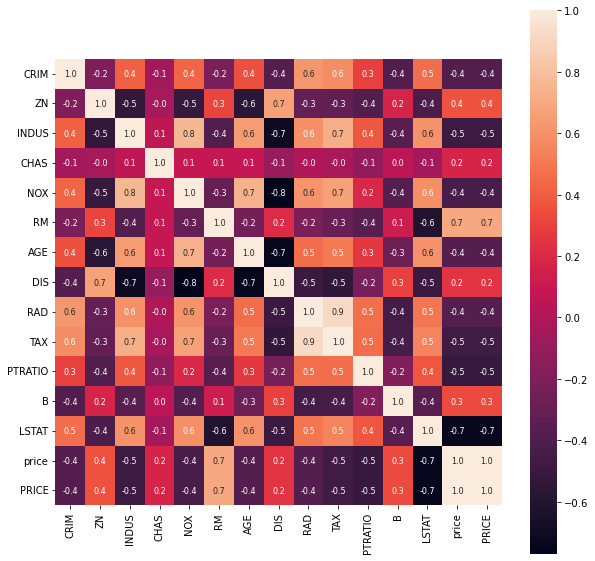

In [18]:
#constructing heat map for correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f',annot = True, annot_kws = {'size':8})

In [20]:
#splitting data and target
X = house_price_dataframe.drop(["PRICE"] , axis =1)
Y = house_price_dataframe["PRICE"]
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [21]:
#splitting into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(506, 14) (404, 14) (102, 14)


# Model Training

In [24]:
#loading the model
model = XGBRegressor()

In [25]:
#training model
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Evaluation

In [26]:
#accuracy for training data prediction
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[23.104218  20.999664  20.100746  34.700226  13.896807  13.498772
 21.998056  15.200623  10.898182  22.698656  13.801939   5.603658
 29.794474  49.998127  34.89979   20.601318  23.398272  19.194048
 32.701378  19.604113  26.999495   8.400901  46.00103   21.703863
 27.100784  19.39857   19.299316  24.799585  22.603905  31.700249
 18.50305    8.700317  17.40239   23.699158  13.301395  10.500437
 12.7001095 25.001328  19.699     14.902422  24.199245  24.998116
 14.900388  16.998014  15.599491  12.7016945 24.496632  15.000115
 49.999382  17.497847  21.198933  31.998161  15.599459  22.899912
 19.300266  18.700033  23.300043  37.20061   30.101002  33.100388
 20.999033  49.998352  13.399538   4.999999  16.499031   8.40194
 28.699446  19.497795  20.599623  45.399597  39.801712  33.3986
 19.80098   33.400944  25.30008   49.999393  12.502471  17.403704
 18.599255  22.600681  50.001106  23.797506  23.30092   23.10027
 41.696777  16.100607  31.600716  36.09919    6.999208  20.40011
 19.999456  12.

In [29]:
#R squared error
score1= metrics.r2_score(Y_train,training_data_prediction)

#mean absolute errror
score2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squred error: ",score1)
print("Mean Absolute error: ",score2)

R squred error:  0.9999999367227798
Mean Absolute error:  0.0016543079130718673


visualizing the actual price and predicted price

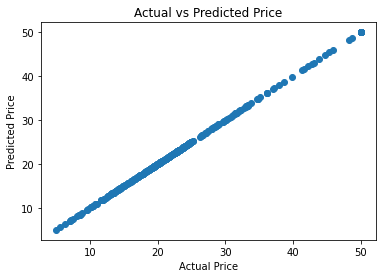

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [30]:
#accuracy for test data prediction
test_data_prediction = model.predict(X_test)

In [32]:
#R squared error
score3 = metrics.r2_score(Y_test, test_data_prediction)

#Mean absolute error
score4 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error on test data: ",score3)
print("Mean absolute error on test data", score4)

R squared error on test data:  0.9977552457096853
Mean absolute error on test data 0.25984229854508956
